In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import timeit
from turtle import *

# Monte Carlo Simulation

###### Abstract 
The problem we would like to address is the calculation of the area under a curve using Monte Carlo method for numerical integration and evaluating its accuracy and timeliness in comparison to the trapezoidal method for calculating the same result.

Here you are provided with a brief description, implementation using python and testing using Student's t-test with one sample. 
Having in mind the null hypothesis (where the mean of the distribution of the results of the Monte Carlo integration is equal to the result of the trapezoidal rule for integration), we did not achieve any significant result and were not able to reject it.

All the used sources of information are listed at the bottom. Wish you a nice reading!

###### Keywords
#simulation, #montecarlo, #probability, #random, #event, #analysis, #numerical, #integration, #approximation, #accuracy, #hypothesis, #numbers, #distribution, #population, #sample

###### Content:

[1.Simulation](#1.-Simulation)<br>
[2.Monte Carlo Method](#2.-Monte-Carlo-Method)<br>
[3.Monte Carlo method for numerical integration](#3.-Monte-Carlo-method-for-numerical-integration)<br>
&emsp;[3.1Description of the method](#3.1.-Description-of-the-method) <br>
[4.Implementation](#4.-Implementation)<br>
&emsp;[4.1.Picking up an example function and an interval we are going to use for the integration](#4.1.-Picking-up-an-example-function-and-an-interval-we-are-going-to-use-for-the-integration)<br>
&emsp;[4.2.Defining a function for the calculation of the integration using Monte Carlo Method](#4.2.-Defining-a-function-for-the-calculation-of-the-integration-using-Monte-Carlo-Method)<br>
[5.Trapezoidal rule](#5.-Trapezoidal-rule)<br>
[6.Accuracy - T-test with One Sample](#6.-Accuracy---T-test-with-One-Sample)<br>
[7.Visualization](#7.-Visualization-of-the-distribution-of-Monte-Carlo-integration-results)<br>
[8.Timing](#8.-Comparison-in-timing)<br>

## 1. Simulation

Simulation is a way to model **random events**, such that simulated outcomes closely match real-world outcomes. 
It is using **randomly generated data** in order to test out statistical methods. With the analysis of the results, the assumptions can be confirmed or rejected.

It can be used to estimate probabilities associated with **real-life events** (such as natural systems, human systems, economics and finance, etc.), where other methods are not so practical. Simulations are most usefull when savings in **time, effort or money** would justify an **approximation** of the result over an exact one.

Examples: the result of a game of darts, the closing price of a stock, the financial status of a gambler playing roulette, the sum of a series of dice rolls

Pros 
* Quick
* Easy
* Inexpensive

*(compared to the process of real data gathering in the same quantity)*

Cons
* Loss in accuracy
* Needs bigger samples to work better (approaching infinity would be best)

The more the numbers, the better the simulation. The bigger the sample of data is, the better the approximations.

## 2. Monte Carlo Method

### Description

Monte Carlo method is known as statistical method for predicting the outcome of complex real-life event using random numbers as input and providing an approximation as output.
The Monte Carlo method is used in a wide range of subjects, including mathematics, physics, biology, engineering, and finance, and in problems in which determining an analytic solution would be too time-consuming.

### Origin

"French scientist Georges Buffon’s method (1777) for calculating pi from dropping needles on a surface with parallel lines on it is considered an early example of the Monte Carlo method. In 1946, while recovering from an illness, American scientist Stanislaw Ulam wondered what was the probability of winning a game of solitaire and realized that simply playing a number of games and noting the percentage of winning games would be much simpler than trying to calculate all the possible combinations of cards. He then further realized that such an approach could be applied to problems such as the production and diffusion of neutrons in radioactive material, a problem in which at each step there were so many possibilities that a solution was impossible to calculate. Ulam and American mathematician John von Neumann worked out the method in greater detail. Because the method is based on random chance, it was named after the famous Monaco casino."

### Esence

Monte Carlo simulation calculates results over and over, each time using **a different set of random values**. Depending upon the number of uncertainties and the ranges specified for them, a Monte Carlo simulation could involve thousands recalculations before it is complete. Monte Carlo simulation produces distributions of possible outcome values.

* Common probability distributions

<img src = "https://www.palisade.com/images3/product/risk/en/Distributions_monteCarloSim.jpg" style="width:600px;height:300px" />

**Normal**

The user simply defines the mean or expected value and a standard deviation to describe the variation about the mean. Values in the middle near the mean are most likely to occur. It is symmetric and describes many natural phenomena such as people’s heights. Examples of variables described by normal distributions include inflation rates and energy prices.

**Lognormal**

Values are positively skewed, not symmetric like a normal distribution. It is used to represent values that don’t go below zero but have unlimited positive potential. Examples of variables described by lognormal distributions include real estate property values, stock prices, and oil reserves.

**Uniform**

All values have an equal chance of occurring, and the user simply defines the minimum and maximum. Examples of variables that could be uniformly distributed include manufacturing costs or future sales revenues for a new product.

**Triangular**

The user defines the minimum, most likely, and maximum values. Values around the most likely are more likely to occur. Variables that could be described by a triangular distribution include past sales history per unit of time and inventory levels.

**PERT**

The user defines the minimum, most likely, and maximum values, just like the triangular distribution. Values around the most likely are more likely to occur. However values between the most likely and extremes are more likely to occur than the triangular; that is, the extremes are not as emphasized. An example of the use of a PERT distribution is to describe the duration of a task in a project management model.

###  Advantages

**Probabilistic Results**
    Results show not only what could happen, but how likely each outcome is.

**Graphical Results**
    Because of the data a Monte Carlo simulation generates, it’s easy to create graphs of different outcomes and their chances of occurrence. This is important for communicating findings to other stakeholders.
    
**Sensitivity Analysis**
    With just a few cases, deterministic analysis makes it difficult to see which variables impact the outcome the most. In Monte Carlo simulation, it’s easy to see which inputs had the biggest effect on bottom-line results.

**Scenario Analysis**
    In deterministic models, it’s very difficult to model different combinations of values for different inputs to see the effects of truly different scenarios. Using Monte Carlo simulation, analysts can see exactly which inputs had which values together when certain outcomes occurred. This is invaluable for pursuing further analysis.

**Correlation of Inputs**
    In Monte Carlo simulation, it’s possible to model interdependent relationships between input variables. It’s important for accuracy to represent how, in reality, when some factors goes up, others go up or down accordingly.

## 3. Monte Carlo method for numerical integration

A common use of Monte Carlo methods is numeric integration using random numbers. It is a particular Monte Carlo method that numerically computes a definite integral. 

Example - using Monte Carlo Integration to calculate an approximation of $ \pi $:

<img src = "https://upload.wikimedia.org/wikipedia/commons/2/20/MonteCarloIntegrationCircle.svg" style="width:200px;height:200px" />

*(Img source By Yoderj, Mysid - Own work, CC0, https://commons.wikimedia.org/w/index.php?curid=35608043)*

An illustration of Monte Carlo integration. In this example, the domain $D$ is the inner circle and the domain $E$ is the square. Because the square's area ($4$) can be easily calculated, the area of the circle ($\pi \cdot 1.02$) can be estimated by the ratio ($0.8$) of the points inside the circle ($40$) to the total number of points ($50$), yielding an approximation for the circle's area of $ 4\cdot0.8 = 3.2 \approx \pi$.

### 3.1 Description of the method

Let's have a random shape with certain area on a piece of paper, and start throwing darts at it.
Assuming that all of the darts you throw are landing on the piece of paper, the probability of a dart actually landing inside the shape is equal to the proportion of the area of the paper that is taken up by the shape itself compared to the area of the whole piece of paper.

We are using this experimental probability to approximate the area taken from the shape, given the area of the whole piece of paper.

Since integration is just finding the area locked between a graph and the axis, we can numerically integrate a function for a given interval with the Monte Carlo method.

$$ \frac{\text{number of points under the graph}}{ \text{generated points}} = \frac{\text{area under graph} }{\text{area of the box }}$$

After we rearange for Area under the graph, we receive:

$$ \text{Area under graph} = \frac{\text{number of points under the graph }}{ \text{generated points }}  \cdot \text{area of the box}$$ 

But in calculus we use definite integrals to find the area under a curve in a given interval, therefore: 

$$ \int_{a}^{b}f(x)\text{ d}x =  \frac{\text{number of points under the graph }}{ \text{generated points }}  \cdot \text{area of the box}$$ 


Below we will implement the Monte Carlo Method for numerical integration and compare the result to the traditional trapezoidal rule.

## 4. Implementation

### 4.1. Picking up an example function and an interval we are going to use for the integration

Let's take the $f(x)= \frac{ln(x)}{x}$ for $x$ in $\left[1, 10 \right]$ as an example:

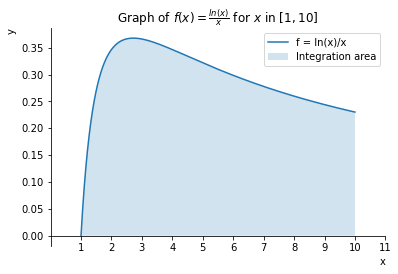

In [3]:
x = np.linspace(1, 10, 1000)
y = np.log(x) / x

plt.plot(x, y, label = "f = ln(x)/x")

# filling the area under the plotted function
plt.fill_between(x, y, alpha = 0.2, label = "Integration area")

#Setting up axis, labels, ticks and title
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("x", loc = "right")
plt.ylabel("y", loc = "top")

plt.xlim(0, 11)
plt.xticks(ticks = range(1,12), label = range(0,12))

plt.title(r'Graph of $f(x)=\frac{ln(x)}{x}$ for $x$ in $\left[1, 10 \right]$')

plt.legend()
plt.show()

### 4.2. Defining a function for the calculation of the integration using Monte Carlo Method 

In [4]:
def monte_carlo_integration(function, x_min, x_max, num_points, total_darts_thrown):
    """ 
    Parameters:
        function - the function under which curve we will caluclate the area
        
        x_min and x_max - are the parameters indicating the beginning and end of the interval on x axis for calculation, 
            they should be given as x_max > x_min.

        num_points - number of ponits needed for the generating the numpy array for x values in the np.linspace function

        total_darts_thrown - number of all the darts we plan to throw at the piece of paper. The more the darts,
            the bigger sample size, the better approximation of the end result
    
    This function calculates numerical approximation for the area under the curve of the given function in the 
    indicated interval using the Monte Carlo method.
    The returned value is the integration result (a floating point number).
    """
    
    points_in_area = 0.0   # setting up a counter for the point landing under the curve
    
    # here we calculate the area of the target rectangle which I will call "full_area"
    # (the piece of paper defined by points: x_min, x_max , y_min and y_max )
    x = np.linspace(x_min, x_max, num_points)
    f_vectorized = np.vectorize(function)
    y = f_vectorized(x)
    y_min = min(y)  # actually the minimum of y in our case is equal to 0
    y_max = max(y)
    assert len(x) == len(y)
    full_area = abs((x_max - x_min)* (y_max - y_min))
    
    # throwing the darts at points with random coordinates x and y in the target rectangle, 
    # counting each one landing under the curve
    for each_point in range(total_darts_thrown):
        x_random = np.random.uniform(x_min, x_max)
        y_random = np.random.uniform(y_min, y_max)
        if y_random <= function(x_random):
            points_in_area += 1
    integration_result = points_in_area / total_darts_thrown * full_area
    return integration_result
    

Lets call the function to see the result:

In [5]:
function = lambda x: np.log(x) / x
# with 10_000 points
monte_carlo_integration(function, 1, 10, 100000, 10000)

2.664624368250482

In [6]:
# with 100_000 points 
monte_carlo_integration(function, 1, 10, 100000, 100000)

2.6509502894223576

## 5. Trapezoidal rule

Now we will define a function for calculating the area under the curve using the traditional trapezoidal rule:

In [7]:
def calculate_trapezoidal_sum(function, x_min, x_max, num_points = 10000):
    """
    Calculates a numerical approximation of the definite integral of the provided function
    between the points x_min and x_max.
    The parameter num_points specifies the number of points at which the integral will be calculated.
    """
    x = np.linspace(x_min, x_max, num_points)
    vectorized_function = np.vectorize(function)
    y = vectorized_function(x)
    assert len(x) == len(y)
    
    sum_of_func_values = np.sum(y)
    delta_x = (x_max - x_min)/ num_points
    
    integration_result = (delta_x /2) * ((2 * sum_of_func_values)- y[0]- y[-1])
    
    return integration_result

Lets call the function to see the result:

In [8]:
trapezoidal_sum = calculate_trapezoidal_sum(lambda x: np.log(x) / x, 1, 10, 100000)
trapezoidal_sum

2.6509225450648475

## 6. Accuracy - T-test with One Sample

We will perform the testing using the T-test of Student, generating 100 values for the integration sum using scipy library.

**Null hypothesis:**  the expected value of the sample is equal to the result of the trapezoidal sum calculated above.

**Alternative hypothesis** - the values differ significanly.

*Disclaimer: Usually would perform the test with much higher number of iterations in order to achieve greater accuracy. Feel free to increase the number of iterations or change the parameters passed to the functions to see the different approximation results.

In [9]:
sample_data = []
for experiment_id in range(100):
    integration_sum = monte_carlo_integration(function, 1, 10, 100000, 100000)
    sample_data.append(integration_sum)
    
sample_data = np.array(sample_data)
sample_data

array([2.64588459, 2.65475784, 2.65085096, 2.64840088, 2.64959281,
       2.65724103, 2.65697615, 2.64313653, 2.66094925, 2.64780492,
       2.65138071, 2.6477387 , 2.65028811, 2.64985769, 2.65191045,
       2.65366524, 2.65111584, 2.64886441, 2.65462541, 2.65442675,
       2.64992391, 2.64787114, 2.65260575, 2.64780492, 2.65138071,
       2.65393011, 2.64840088, 2.65157936, 2.64578526, 2.65323482,
       2.64797047, 2.65489028, 2.65217533, 2.65873094, 2.65015567,
       2.64744072, 2.64886441, 2.65194356, 2.6404878 , 2.65535381,
       2.65432742, 2.64449401, 2.64307031, 2.64095133, 2.6535328 ,
       2.65012256, 2.65194356, 2.65869783, 2.65363213, 2.64707652,
       2.65028811, 2.65293684, 2.65909514, 2.65813497, 2.65012256,
       2.65164558, 2.65144693, 2.65038743, 2.65763834, 2.64724206,
       2.65161247, 2.64436157, 2.64820223, 2.65654574, 2.65141382,
       2.65326793, 2.64403048, 2.65224155, 2.65197667, 2.63922965,
       2.65462541, 2.652076  , 2.6484671 , 2.65042054, 2.65194

In [10]:
sample_data.mean(), trapezoidal_sum

(2.6512433053972457, 2.6509225450648475)

In [11]:
sample_data.std()

0.004287596216657551

In [12]:
ttest_1samp(sample_data,trapezoidal_sum)

Ttest_1sampResult(statistic=0.744362306829356, pvalue=0.4584205466942092)

If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. We are not able to reject the null hypothesis.

## 7. Visualization of the distribution of Monte Carlo integration results

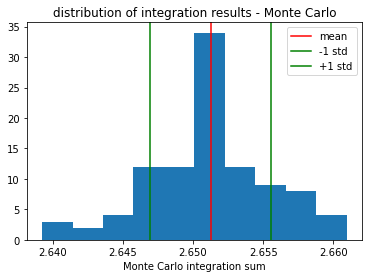

In [13]:
plt.hist(sample_data)

plt.axvline(sample_data.mean(), color="red", label= "mean")
plt.axvline(sample_data.mean()- sample_data.std(), color="green", label= "-1 std")
plt.axvline(sample_data.mean()+ sample_data.std(), color="green", label= "+1 std")

plt.xlabel("Monte Carlo integration sum")
plt.title("distribution of integration results - Monte Carlo")

plt.legend()
plt.show()

## 8. Comparison in timing

We will define a function for measuring the time of execution of a provided function using timeit library:

In [14]:
def measure_timing(calling_of_function, count_of_measurements):
    time_of_execution = timeit.timeit(stmt = calling_of_function, globals = globals(), number = count_of_measurements)
    mean_time_of_execution = time_of_execution / count_of_measurements
    return mean_time_of_execution

Calculating the time of the trapezoidal rule:

In [15]:
time_trapezoidal = measure_timing('calculate_trapezoidal_sum(lambda x: np.log(x) / x, 1, 10, 100000)', 10)
time_trapezoidal

0.12344797000000085

Calculating the time of the Monte Carlo Method:

In [16]:
time_monte_carlo = measure_timing('monte_carlo_integration(function, 1, 10, 100000, 100000)', 10)
time_monte_carlo

0.8119320099999996

Lets calculate the ratio in time for the two methods:

In [17]:
ratio_in_time = time_monte_carlo / time_trapezoidal
ratio_in_time

6.577119170124822

## Conclusions

Although the Monte Carlo method is much slower than the trapezoidal rule calculation, we did achieve great accuracy in the final appoximation. *(more than 6 times slower with this setup of parameters and taking into consideration the capabilites of my PC of course)* Monte Carlo simulation could be much more efficient and useful in the approximation of higher-dimensional integration sums.

..... Somehow you managed to get to this part ... Such a patience of yours! 
Well, let's have some fun!

### A little bit of Numpy in my life
#### A little bit of timeit by my side
##### A little bit of Turtle is all I need
###### A little bit of scipy is what I see

All of this randomness led me to a random change in the topic. Let's draw a three using recursion and the Turtle library (as we did in the homework) but we will spice things a little bit by multiplying the angle by a randomly generated number between 0 and 1. The result looks more like a three drawn by Picasso, don't you think ?

In [18]:
def draw_branch(branch_length, angle, branch_width):
    if branch_length > 5:
        width(branch_width)
        forward(branch_length)
        right(angle*np.random.rand())
        draw_branch(branch_length - 15, angle, branch_width - 1.5)
        left(2 * angle)
        draw_branch(branch_length - 15, angle, branch_width - 1.5)
        right(angle*np.random.rand())
        backward(branch_length)
        
        
def draw_tree(trunk_length, angle, trunk_width):
    speed("fastest")
    left(90)
    up()
    backward(trunk_length/2)
    down()
    draw_branch(trunk_length, angle, trunk_width)
    done()

In [19]:
draw_tree(100, 30, 12)

###  References

1. [Stat Trek](https://stattrek.com/experiments/simulation.aspx)

2. [Magoosh Statistic Blog](https://magoosh.com/statistics/simulation-statistics-explained/#:~:text=Simulation%20statistics%20is%20using%20artificially,data%20to%20test%20them%20out)

3. [Wikipedia - Simulation](https://en.wikipedia.org/wiki/Simulation)

4. [Wikipeadia - Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method)

5. [Wikipedia - Monte Carlo Integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration)

6. [The Monte Carlo Method - Youtube](https://www.youtube.com/watch?v=q6gJ2T0NSwM)

7. [GeeksForGeeks](https://www.geeksforgeeks.org/timeit-python-examples/)

8. [PyNative](https://pynative.com/python-get-execution-time-of-program/#wall-time-vs-cpu-time)

9. [Britannica](https://www.britannica.com/science/Monte-Carlo-method)

10. [Palisade](https://www.palisade.com/risk/monte_carlo_simulation.asp)

11. [MIT OpenCourseWare - 6. Monte Carlo Simulation](https://www.youtube.com/watch?v=OgO1gpXSUzU)

*Ilina Nedeva* <br/>
ilina.nedeva94@gmail.com <br/>
Varna, Bulgaria
09.06.2022